# **Predictive Modeling for Advertising Conversion Rates**

# **Data Fetching and Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
adv_data = pd.read_csv('/content/drive/MyDrive/MIS-515_PR/advertising.csv')

In [ ]:
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
# used to generate descriptive statistics of the DataFrame
adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
# print(adv_data.isnull().sum())
data = adv_data[adv_data['Age'] <= 50]
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
994,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# **Exploratory Data Analysis**

In [ ]:
# Using seaborn to explore the data

Text(0.5, 0, 'Age')

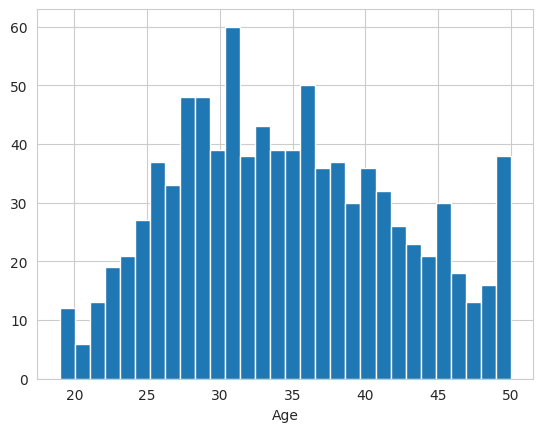

In [ ]:
# Shows the histogram of the Age parameter which is slightly normally distributed
sns.set_style('whitegrid')
data['Age'].hist(bins=30)
plt.xlabel('Age')

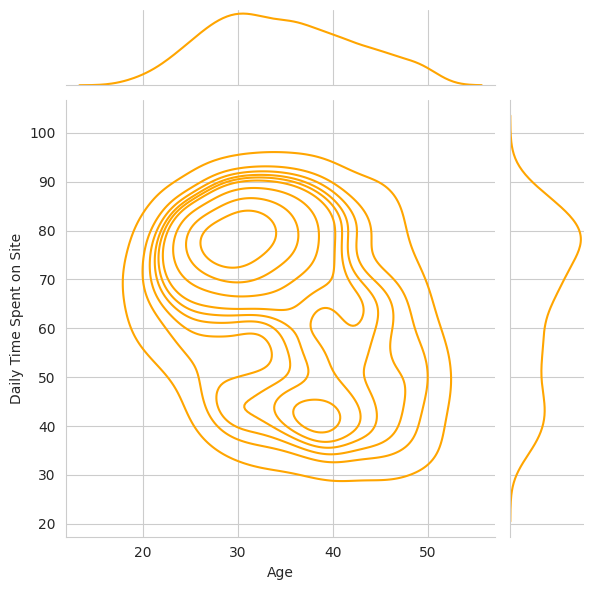

In [ ]:
#Creating a kernel density estimation (KDE) plot to visualize the relationship between age and daily time spent on site.
#KDE works by placing a kernel (a smooth, symmetric function) at each data point

sns.jointplot(x='Age',y='Daily Time Spent on Site',data=data,color='orange',kind='kde');

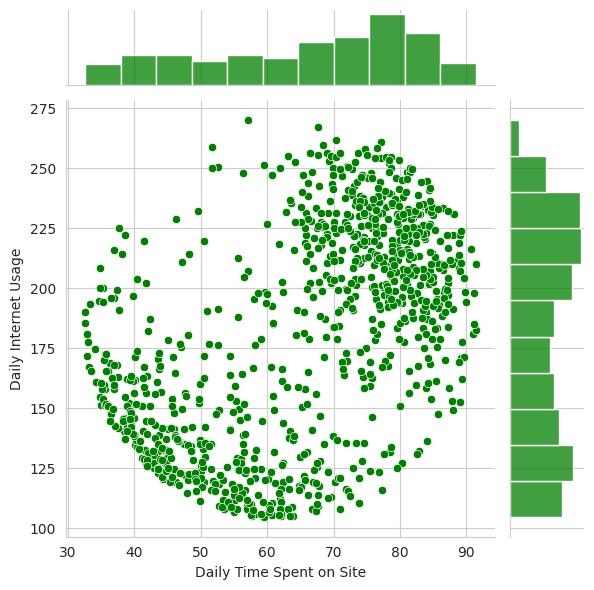

In [ ]:
#Visualizing the relationship between daily time spent on site and daily internet usage
# Joint plots provide insights into the joint distribution of the variables
# and can help in understanding the correlation between two variables and identifying any patterns or trends in the data.

sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,color='green')


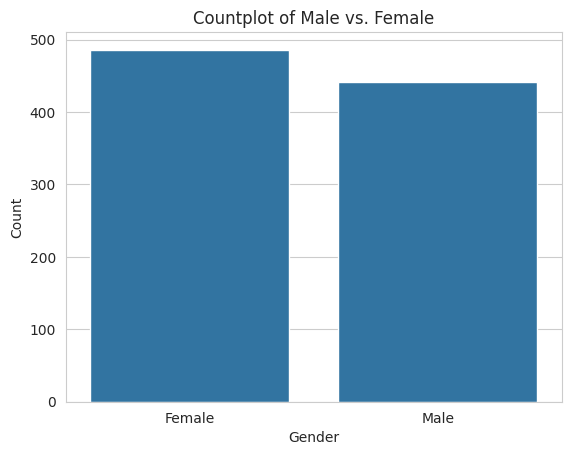

In [ ]:
# Count plot of Male vs Female
sns.countplot(x='Male', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Countplot of Male vs. Female')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()




# **Linear Regression**

In order to peform train test split, and train our model!

**We Split the data into 80% training set and 20% testing set using train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# One-hot encoding for categorical variables
X = pd.get_dummies(data[['Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'Male', 'Country', 'City']])

# Target variable
y = data['Area Income']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the linear regression model
linreg = LinearRegression()

# Train the model
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: -0.13162654398849138


In [ ]:
import xgboost as xgb

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # objective function
    'eval_metric': 'rmse'              # evaluation metric
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain)

# Predict on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost R-squared:", r2_xgb)


XGBoost R-squared: 0.12228828577669493


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest R-squared:", r2_rf)


Random Forest R-squared: 0.24577362113525636


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting R-squared:", r2_gb)


Gradient Boosting R-squared: 0.23514376881644516


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Define meta-learner
meta_learner = LinearRegression()

# Initialize stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_learner)

# Train stacking regressor
stacking_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_stacking = stacking_regressor.predict(X_test)

# Evaluate the model
r2_stacking = r2_score(y_test, y_pred_stacking)

print("Stacking R-squared:", r2_stacking)


Stacking R-squared: 0.253845534729363
